In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [54]:
# import in csv and name columns

# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - percentage of lower status of the population
# MEDV - Median value of owner-occupied homes in $10000's

In [55]:
# Features I think would be goodd for clustering
#-- PTRATIO
#-- AGE

In [56]:
file = '/Users/niciat/Downloads/bost_housing_augmented.csv'
boston_data = pd.read_csv(file)
boston_data.head()

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [57]:
# Create a dataframe for the independent variables
independent_variables = boston_data.drop(['RM','OBS.', 'TOWN#', 'B', 'TRACT', 'TOWN'],axis=1)
independent_variables.head()

,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,4.98
1,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,9.14
2,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,4.03
3,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,2.94
4,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,5.33


In [58]:
# Choose the dependent variable 
dependent_variable = boston_data['RM']

In [59]:
# Create the training sets
X_train, X_test, Y_train, Y_test = train_test_split(independent_variables, dependent_variable, test_size = 0.2, random_state=5)


In [60]:
# Create the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [61]:
# Create the models
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("Performance for training set")
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))
print("\n")


y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("Performance for testing set")
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))

Performance for training set
R2 score is 0.5057265580284648
RMSE is 0.48655904456206117


Performance for testing set
R2 score is 0.6897523622003736
RMSE is 0.41187435070292905


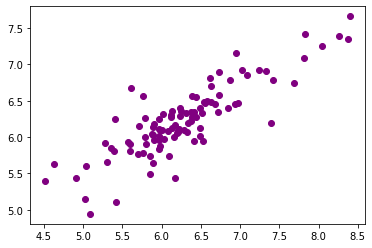

In [62]:
plt.scatter(Y_test, y_test_predict, c = 'purple')